In [4]:
import requests
import random
import string
import psycopg2
import json
import time
import pandas as pd



db_settings = {
    "dbname": 'scrappeddata',
    "user": 'postgres',
}

conn = psycopg2.connect(**db_settings)
c = conn.cursor()

In [14]:
c.execute("SELECT * FROM reddit_posts;")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
posts = pd.DataFrame(rows, columns=colnames)


In [15]:
c.execute("SELECT * FROM reddit_comments;")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
comments = pd.DataFrame(rows, columns=colnames)

In [16]:
c.execute("SELECT * FROM spotify_artists;")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
artists = pd.DataFrame(rows, columns=colnames)

In [17]:
c.execute("SELECT * FROM artist_albums;")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
albums = pd.DataFrame(rows, columns=colnames)

In [18]:
c.execute("SELECT * FROM artist_top_tracks;")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
tracks = pd.DataFrame(rows, columns=colnames)

In [20]:
c.execute("SELECT * FROM track_audio_features;")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
audio_features = pd.DataFrame(rows, columns=colnames)

In [10]:
print(tracks.head())

print(audio_features.head())

                 track_id                         track_name  \
0  1nO6DT2QIYTxwLGrfQvIt3                        club heaven   
1  4ka1FkKAMde6dQAFFMXKac  i hope ur miserable until ur dead   
2  6h1s7cKnUtsbRpE5bwnUTf                dying on the inside   
3  2GQqCyDCD0Z7BL2otJkFRh                                lie   
4  00KfWWFFY3b6n9WU7a0nWy                          sincerely   

  track_release_date available_markets track_popularity  \
0         2023-10-06              None               74   
1         2021-08-06              None               70   
2         2022-02-25              None               70   
3         2023-06-23              None               68   
4         2021-09-10              None               67   

                artist_id                album_id class_mhs  confidence  
0  7pwufEBGfggjoI8twqlsmQ  119D6p9ScXWYQxWLMv99yn    normal    0.999731  
1  7pwufEBGfggjoI8twqlsmQ  3dv1xXXFHlv3WNSNsSZ93d      flag    0.987328  
2  7pwufEBGfggjoI8twqlsmQ  67sFRrnPbvz

In [15]:
merged_df = pd.merge(tracks, audio_features, on='track_id')

# Convert 'track_popularity' to numeric if it's not already
merged_df['track_popularity'] = pd.to_numeric(merged_df['track_popularity'], errors='coerce')
merged_df.head()



,track_id,track_name,track_release_date,available_markets,track_popularity,artist_id,album_id,class_mhs,confidence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1nO6DT2QIYTxwLGrfQvIt3,club heaven,2023-10-06,None,74,7pwufEBGfggjoI8twqlsmQ,119D6p9ScXWYQxWLMv99yn,normal,0.999731,0.080400,0.396,0.640,0.000000,0.0824,-6.209,0.2080,95.633,0.3710
1,4ka1FkKAMde6dQAFFMXKac,i hope ur miserable until ur dead,2021-08-06,None,70,7pwufEBGfggjoI8twqlsmQ,3dv1xXXFHlv3WNSNsSZ93d,flag,0.987328,0.027300,0.706,0.544,0.000000,0.0870,-7.275,0.0306,115.935,0.4770
2,6h1s7cKnUtsbRpE5bwnUTf,dying on the inside,2022-02-25,None,70,7pwufEBGfggjoI8twqlsmQ,67sFRrnPbvz9Te28kO6Ktu,normal,0.998694,0.000527,0.539,0.587,0.000000,0.1710,-4.603,0.0371,124.849,0.4290
3,2GQqCyDCD0Z7BL2otJkFRh,lie,2023-06-23,None,68,7pwufEBGfggjoI8twqlsmQ,6uy43Z8UWtPQS7tnddxU8G,normal,0.984697,0.319000,0.648,0.501,0.000081,0.1270,-8.262,0.0399,155.040,0.6560
4,00KfWWFFY3b6n9WU7a0nWy,sincerely,2021-09-10,None,67,7pwufEBGfggjoI8twqlsmQ,4TrwWZCvhaw07kchbcba0S,normal,0.998611,0.942000,0.408,0.317,0.000490,0.2750,-11.244,0.0400,131.045,0.0662


In [16]:
# Select relevant columns for correlation analysis
selected_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'track_popularity']

# Create a correlation matrix
correlation_matrix = merged_df[selected_columns].corr()

# Display the correlation matrix
print(correlation_matrix)



                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.437532 -0.767101          0.493643   
danceability         -0.437532      1.000000  0.410651         -0.404177   
energy               -0.767101      0.410651  1.000000         -0.502766   
instrumentalness      0.493643     -0.404177 -0.502766          1.000000   
liveness             -0.145934     -0.018365  0.232695         -0.098413   
loudness             -0.666709      0.594895  0.770727         -0.670255   
speechiness          -0.126012      0.257657  0.143591         -0.158087   
tempo                -0.225788      0.084561  0.266537         -0.187890   
valence              -0.373451      0.548159  0.479319         -0.418356   
track_popularity     -0.293568      0.268160  0.282530         -0.367934   

                  liveness  loudness  speechiness     tempo   valence  \
acousticness     -0.145934 -0.666709    -0.126012 -0.225788 -0.373451   
danceability     

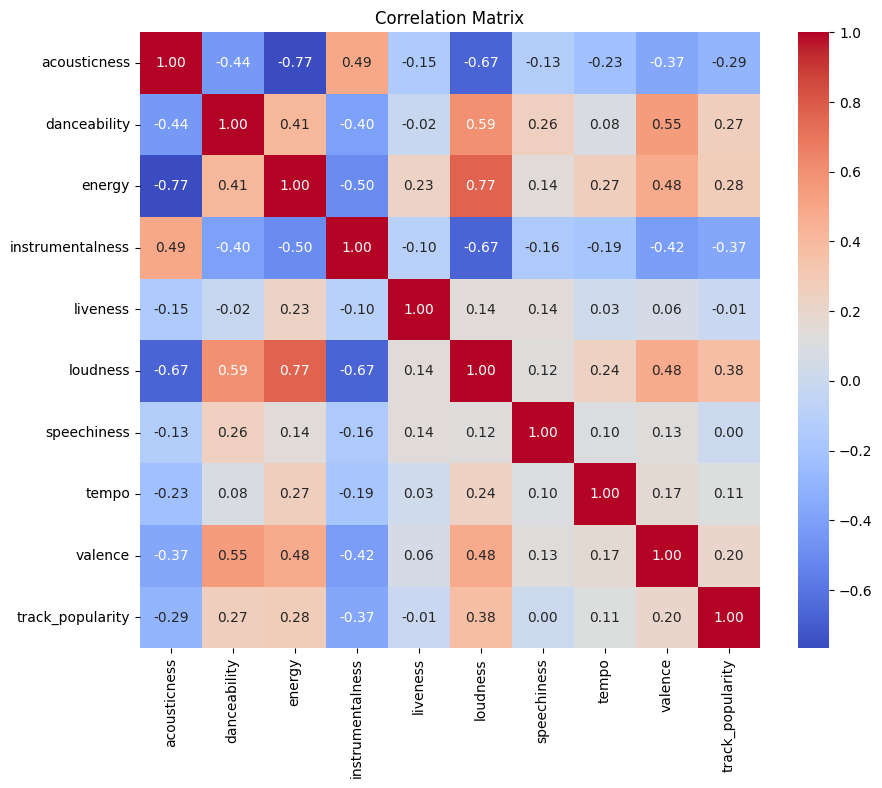

In [17]:
# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

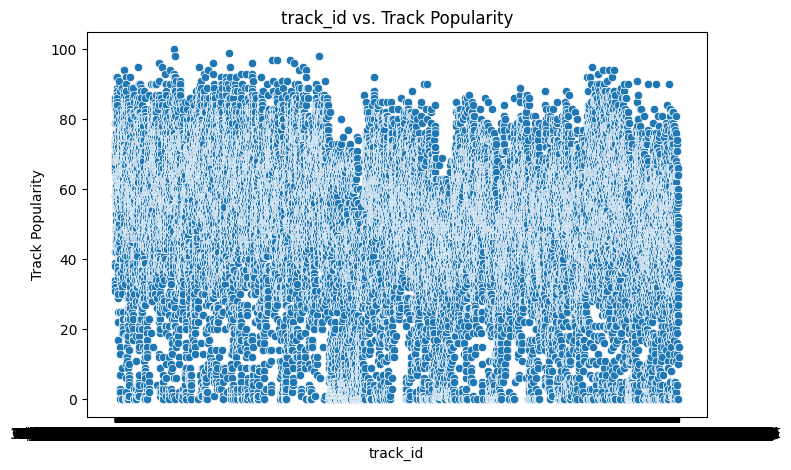

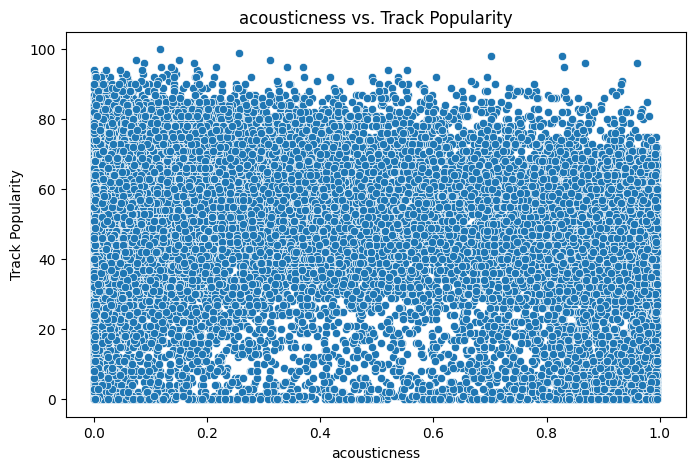

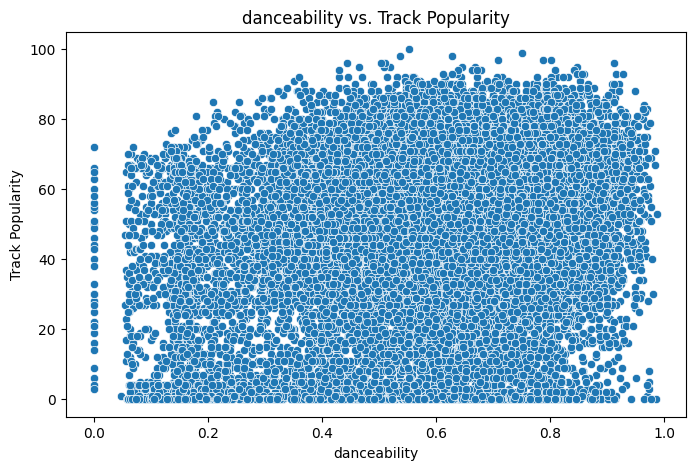

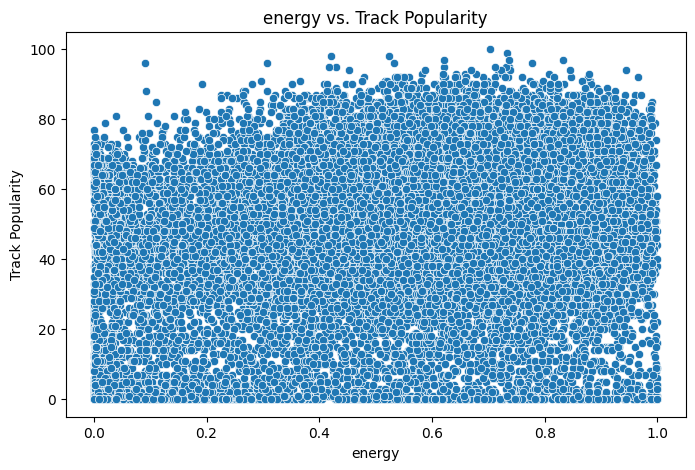

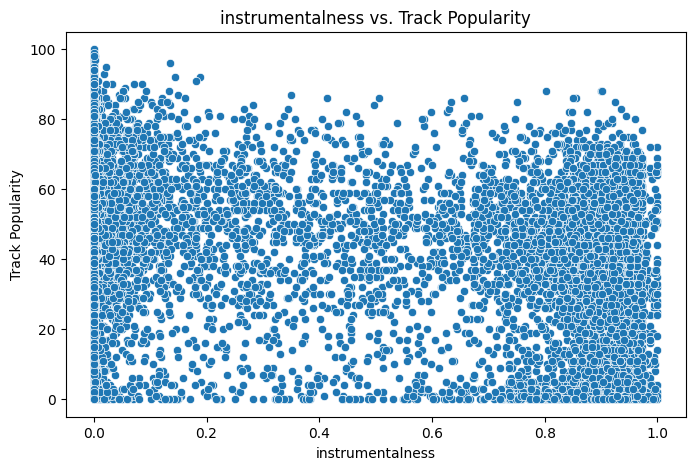

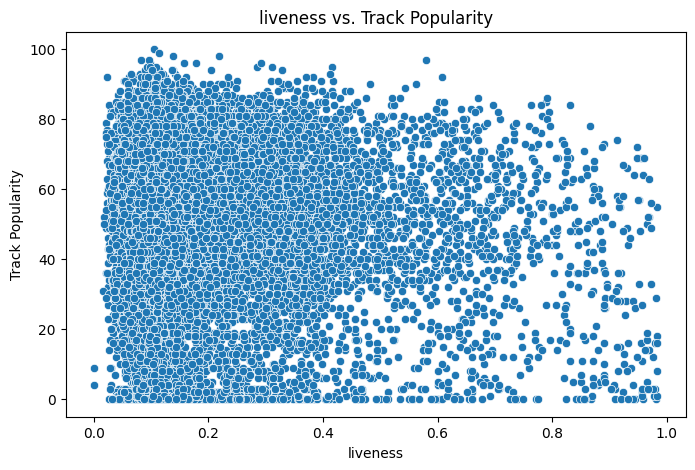

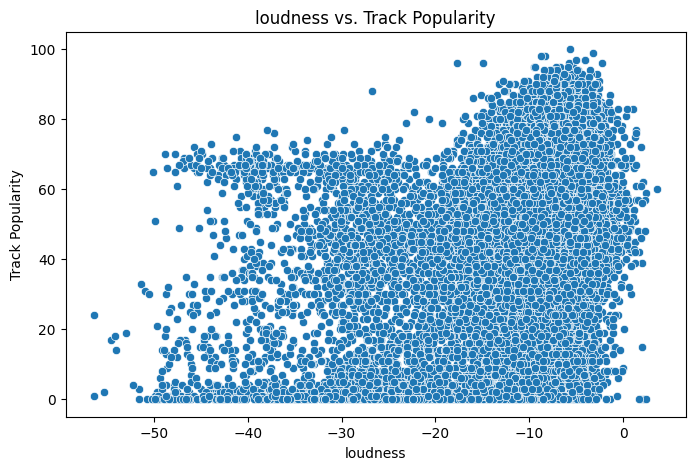

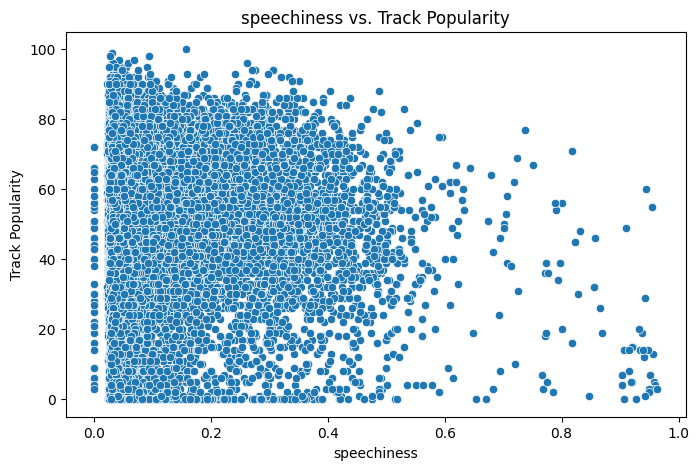

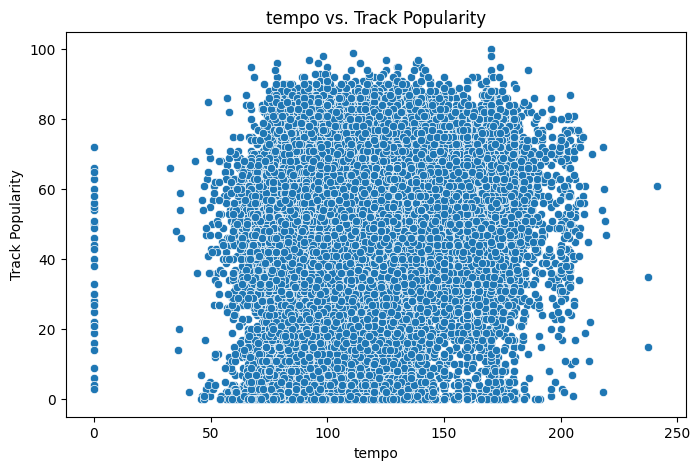

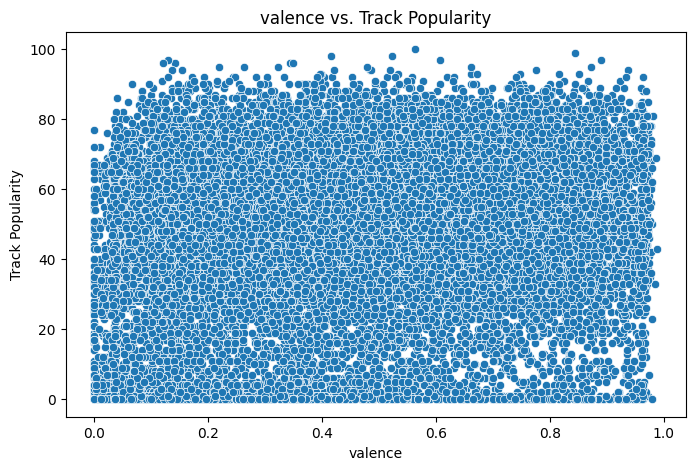

In [18]:
for feature in audio_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=merged_df[feature], y=merged_df['track_popularity'])
    plt.title(f'{feature} vs. Track Popularity')
    plt.xlabel(feature)
    plt.ylabel('Track Popularity')
    plt.show()

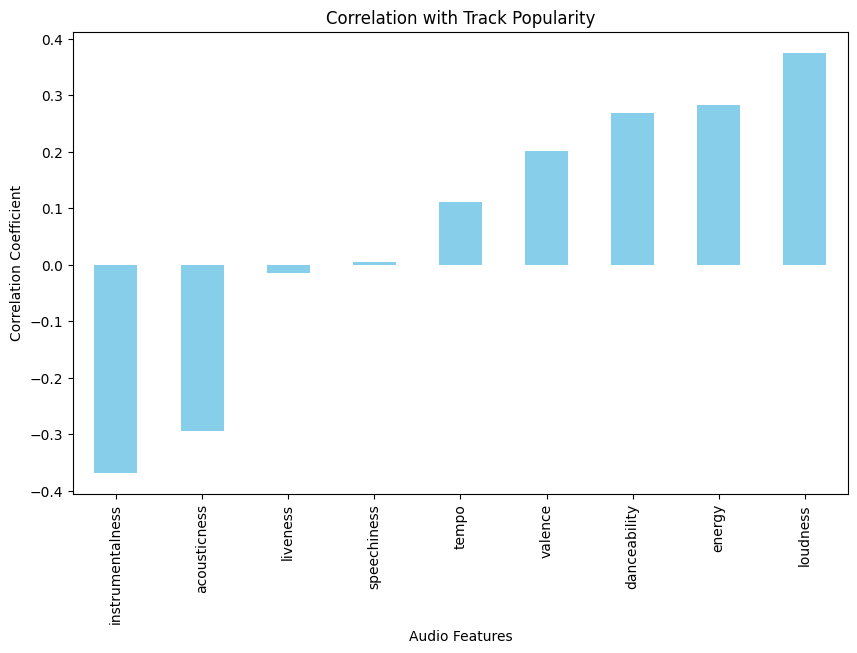

In [19]:
plt.figure(figsize=(10, 6))
correlation_with_popularity = correlation_matrix['track_popularity'].drop('track_popularity')  # Exclude popularity itself
correlation_with_popularity.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlation with Track Popularity')
plt.xlabel('Audio Features')
plt.ylabel('Correlation Coefficient')
plt.show()


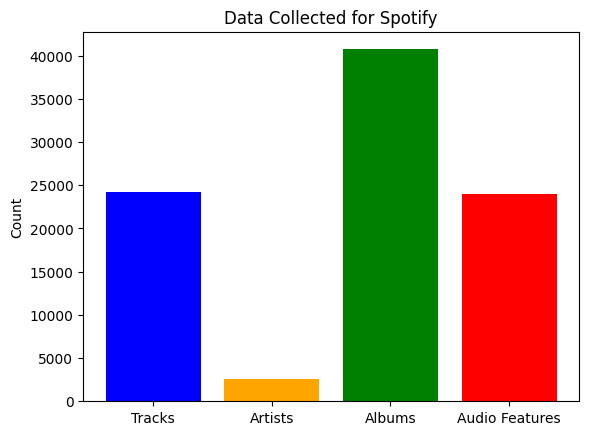

In [15]:
# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
tracks_count = len(tracks)
artists_count = len(artists)
albums_count = len(albums)
audio_features_count = len(audio_features)

# Create a bar plot
df_names = ['Tracks', 'Artists', 'Albums', 'Audio Features']
counts = [tracks_count, artists_count, albums_count, audio_features_count]

plt.bar(df_names, counts, color=['blue', 'orange', 'green', 'red'])
plt.title('Data Collected for Spotify')
plt.ylabel('Count')
plt.savefig("spotify_data_collection.png")
plt.show()

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrames are named 'posts' and 'comments'

# List of specific subreddits
subreddits_of_interest = ['music', 'LetsTalkMusic', 'MusicRecommendations', 'indieheads', 'popheads', 'Spotify',
                           'MusicRecommendations', 'kpop', 'TaylorSwift', 'Coldplay', 'hiphopheads', 'rap', 'Kanye',
                           'arcticmonkeys', 'Eminem', 'politics']

# Filter posts DataFrame for specified subreddits
posts_subreddit_counts = posts[posts['subreddit'].isin(subreddits_of_interest)]['subreddit'].value_counts()

# Filter comments DataFrame for specified subreddits
comments_subreddit_counts = comments[comments['subreddit'].isin(subreddits_of_interest)]['subreddit'].value_counts()

# Create separate bar plots for posts and comments
# fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# # Bar plot for posts
# axes[0].bar(posts_subreddit_counts.index, posts_subreddit_counts, color='skyblue')
# axes[0].set_title('Count of Entries in Specific Subreddits (Posts)')
# axes[0].set_xlabel('Subreddits')
# axes[0].set_ylabel('Count')
# axes[0].tick_params(axis='x', rotation=45, ha='right')

# # Bar plot for comments
# axes[1].bar(comments_subreddit_counts.index, comments_subreddit_counts, color='lightcoral')
# axes[1].set_title('Count of Entries in Specific Subreddits (Comments)')
# axes[1].set_xlabel('Subreddits')
# axes[1].set_ylabel('Count')
# axes[1].tick_params(axis='x', rotation=45, ha='right')

# plt.tight_layout()
# plt.show()


/tmp/ipykernel_872301/923784205.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(posts_subreddit_counts.index, rotation=45, ha='right')  # Set rotation here
/tmp/ipykernel_872301/923784205.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(comments_subreddit_counts.index, rotation=45, ha='right')  # Set rotation here


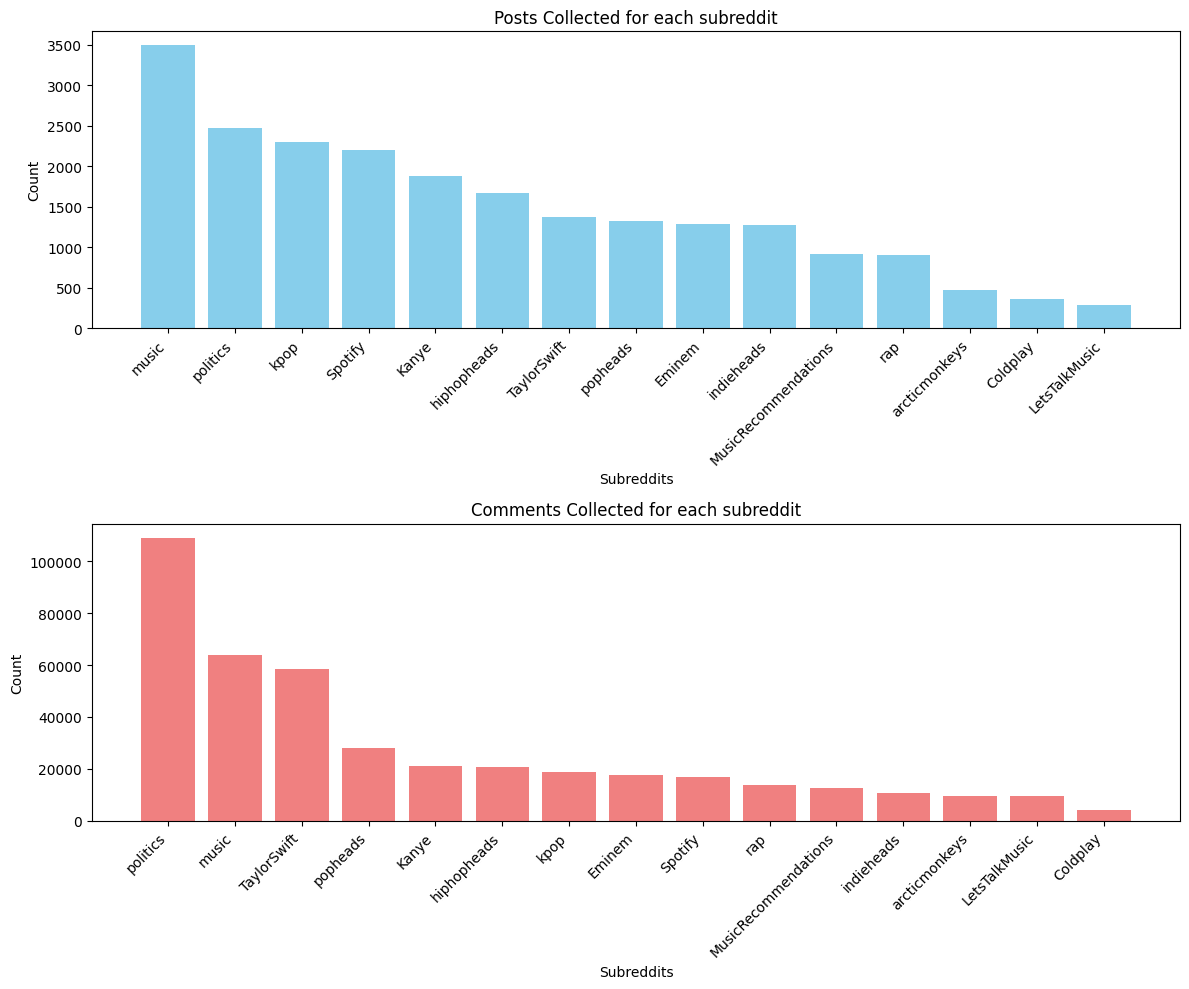

In [34]:
combined_counts = pd.concat([posts_subreddit_counts, comments_subreddit_counts], axis=1, keys=['Posts', 'Comments'])

# Convert index to string
combined_counts.index = combined_counts.index.astype(str)

# Create a bar plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for posts
axes[0].bar(posts_subreddit_counts.index, posts_subreddit_counts, color='skyblue')
axes[0].set_title('Posts Collected for each subreddit')
axes[0].set_xlabel('Subreddits')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(posts_subreddit_counts.index, rotation=45, ha='right')  # Set rotation here

# Bar plot for comments
axes[1].bar(comments_subreddit_counts.index, comments_subreddit_counts, color='lightcoral')
axes[1].set_title('Comments Collected for each subreddit')
axes[1].set_xlabel('Subreddits')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(comments_subreddit_counts.index, rotation=45, ha='right')  # Set rotation here

plt.tight_layout()
plt.savefig("reddit_data_collection.png")
plt.show()

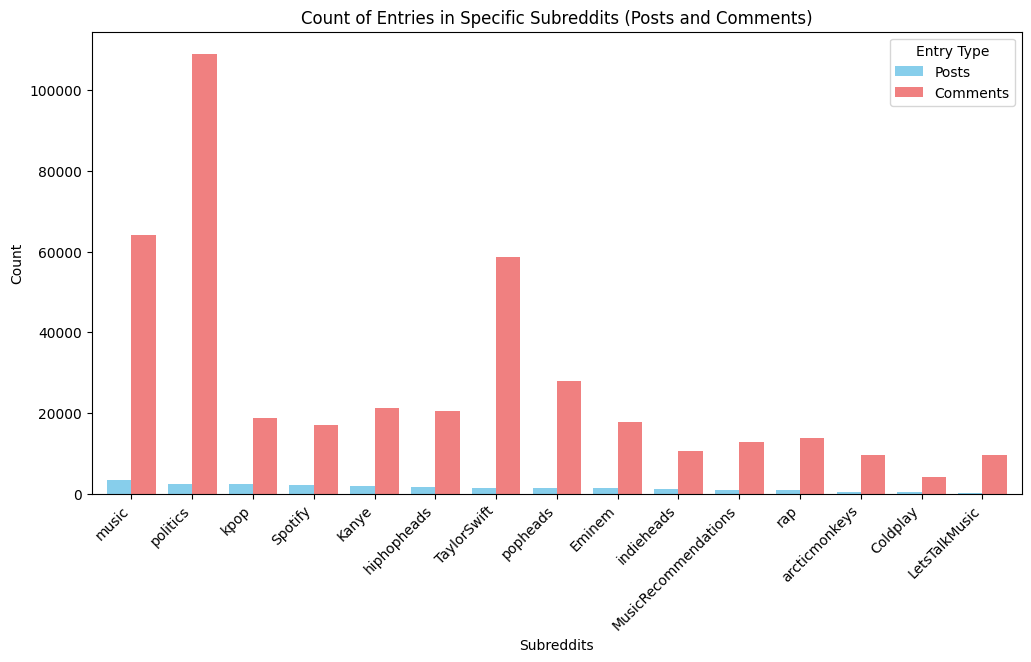

In [28]:
combined_counts = pd.concat([posts_subreddit_counts, comments_subreddit_counts], axis=1, keys=['Posts', 'Comments'])

# Create a bar plot
combined_counts.sort_values(by='Posts', ascending=False).plot(kind='bar', figsize=(12, 6), width=0.8, color=['skyblue', 'lightcoral'])
plt.title('Count of Entries in Specific Subreddits (Posts and Comments)')
plt.xlabel('Subreddits')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Entry Type')
plt.show()

In [24]:
merged_df_title = pd.merge(posts, tracks, left_on='title', right_on='track_name', how='inner')

# Merge based on track_name in selftext
merged_df_selftext = pd.merge(posts, tracks, left_on='selftext', right_on='track_name', how='inner')

# Concatenate the two merged DataFrames
merged_df = pd.concat([merged_df_title, merged_df_selftext])

# Drop duplicate rows based on post_id
merged_df = merged_df.drop_duplicates(subset='post_id')

# Display the resulting DataFrame
print(merged_df)

    post_id                                              title  score  \
0   17cnc0y                                Dirty Little Secret      0   
1   17jm97l                                             apathy      1   
2   17k6v5i                                          Discovery      1   
3   17jxw1x                                        Night Drive      1   
4   17kz0ll                                                  .      1   
5   182jpg1                                                  .      1   
6   17m2evq                                      Bad Influence      0   
7   17noz7k                                       Now and Then      2   
8   17q46uw                                              Day 1      1   
9   180y2vf                                              Day 1      1   
10  17qexmp                                               True      1   
11  17r7a1k                                             Wolves      1   
12  17rdpix                                        

In [53]:
c.execute("SELECT * FROM reddit_posts where subreddit = 'politics';")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
non_poltics_posts = pd.DataFrame(rows, columns=colnames)
flagged_posts_df = non_poltics_posts[(non_poltics_posts['title_class'] == 'flag') | (non_poltics_posts['selftext_class'] == 'flag')]



In [55]:
c.execute("SELECT * FROM reddit_comments where subreddit = 'politics';")
rows = c.fetchall()
colnames = [column[0] for column in c.description]
non_poltics_comments = pd.DataFrame(rows, columns=colnames)
flagged_comments_df = non_poltics_comments[(non_poltics_comments['body_class'] == 'flag')]

In [48]:
print(flagged_posts_df.head())

      post_id                                              title  score  \
2356  17xv8e3                                       Can we stop?      2   
2694  17k781u                    Fuck all of you (I’m Kanye btw)     11   
2921  17kcr27                                Die Now, Cry Later…     39   
3406  17xwvst  "How am I Antisemitic, I just f*cked a jewish ...      5   
3573  17kv223                                 DIE NOW, CRY LATER      2   

                    author          date   url  upvote_ratio  \
2356             1ekilaton  1.700272e+09  None          1.00   
2694  Repulsive-Manager853  1.698709e+09  None          0.87   
2921         slimjwalker23  1.698726e+09  None          0.97   
3406  ThatDudeFromFortnite  1.700277e+09  None          0.86   
3573            beat_mansh  1.698786e+09  None          0.75   

                                               selftext subreddit title_class  \
2356  I'm glad all of you are addicts and want an al...    Eminem      normal   
26

In [87]:
# posts = non_poltics_posts
# comments = non_poltics_comments
flagged_post_counts = posts[(posts['title_class'] == 'flag') | (posts['selftext_class'] == 'flag')].count()['post_id']
non_flagged_post_counts = posts.count()['post_id'] - flagged_post_counts

flagged_comment_counts = comments[(comments['body_class'] == 'flag')].count()['comment_id']
non_flagged_comment_counts = comments.count()['comment_id'] - flagged_comment_counts

print(flagged_post_counts)
# Create a bar plot
# sns.barplot(x=['Flagged', 'Non-Flagged'], y=[flagged_counts, non_flagged_counts])
# plt.title('Flagged vs Non-Flagged Posts and Comments')
# plt.ylabel('Number of Posts and Comments')
# plt.show()

33


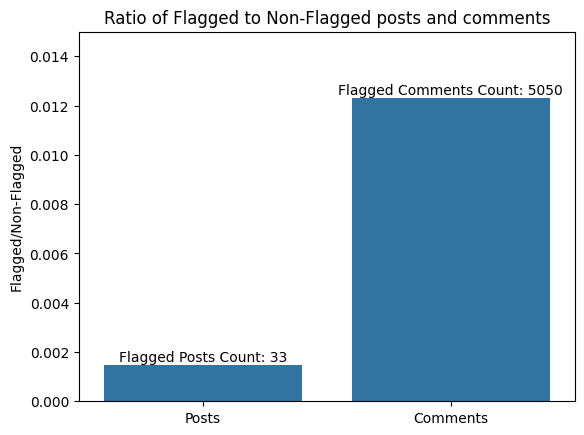

In [91]:
# Calculate the ratios
post_ratio = flagged_post_counts / non_flagged_post_counts
comment_ratio = flagged_comment_counts / non_flagged_comment_counts

# Create a bar plot
ax = sns.barplot(x=['Posts', 'Comments'], y=[post_ratio, comment_ratio])
plt.title('Ratio of Flagged to Non-Flagged posts and comments')
plt.ylabel('Flagged/Non-Flagged')
plt.ylim(0, 0.015)  # Set the y-axis scale to be from 0 to 1

# Add text annotations on top of each bar
ax.text(0, post_ratio, f'Flagged Posts Count: {flagged_post_counts}', ha='center', va='bottom')
ax.text(1, comment_ratio, f'Flagged Comments Count: {flagged_comment_counts}', ha='center', va='bottom')
# plt.savefig("hatespeech.png")
plt.show()

In [21]:


# Create a dictionary to store counts for each artist
artist_counts = {}

print(combined_df.values[0][0])

Taylor Swift


In [23]:
# Function to count mentions in posts and comments
def count_mentions(data, artist_name):
    # Check mentions in titles and self-text for posts
    posts_mentions = data[data['title'].str.contains(artist_name, case=False, na=False) |
                          data['selftext'].str.contains(artist_name, case=False, na=False)]

    # Check mentions in comments
    comments_mentions = comments[comments['body'].str.contains(artist_name, case=False, na=False)]

    # Return counts
    return len(posts_mentions), len(comments_mentions)

# Loop through each artist in the 'artists' DataFrame
for artist in combined_df.values:
    # Count mentions in posts and comments for the current artist
    posts_count, comments_count = count_mentions(posts, artist[0])
    
    # Update the dictionary with counts
    artist_counts[artist[0]] = {'posts_count': posts_count, 'comments_count': comments_count}

# Convert the dictionary to a DataFrame for easy visualization


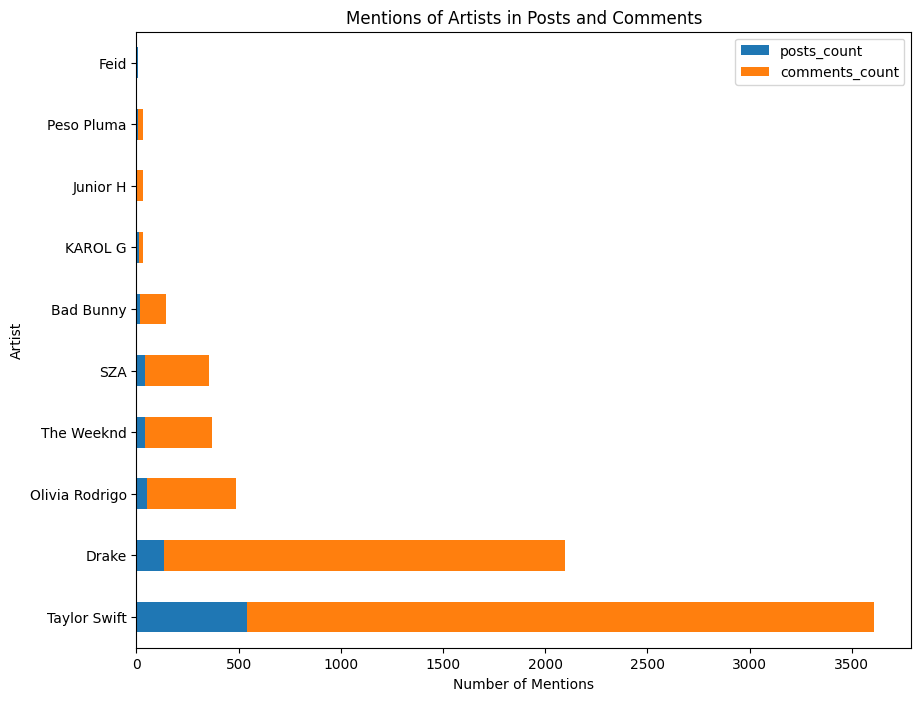

In [25]:
artist_counts_df = pd.DataFrame.from_dict(artist_counts, orient='index')

# Plot a horizontal bar graph
fig, ax = plt.subplots(figsize=(10, 8))

# Sort DataFrame by the sum of posts and comments counts
artist_counts_df['total_mentions'] = artist_counts_df['posts_count'] + artist_counts_df['comments_count']
sorted_df = artist_counts_df.sort_values(by='total_mentions', ascending=False)

# Plot the horizontal bar chart
sorted_df.plot(kind='barh', y=['posts_count', 'comments_count'], stacked=True, ax=ax)
ax.set_xlabel('Number of Mentions')
ax.set_ylabel('Artist')
ax.set_title('Mentions of Artists in Posts and Comments')
plt.savefig("Artist mentions in reddit.png")

plt.show()


/tmp/ipykernel_874909/2880135497.py:106: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  combined_df = pd.read_sql(combined_table_query, conn)


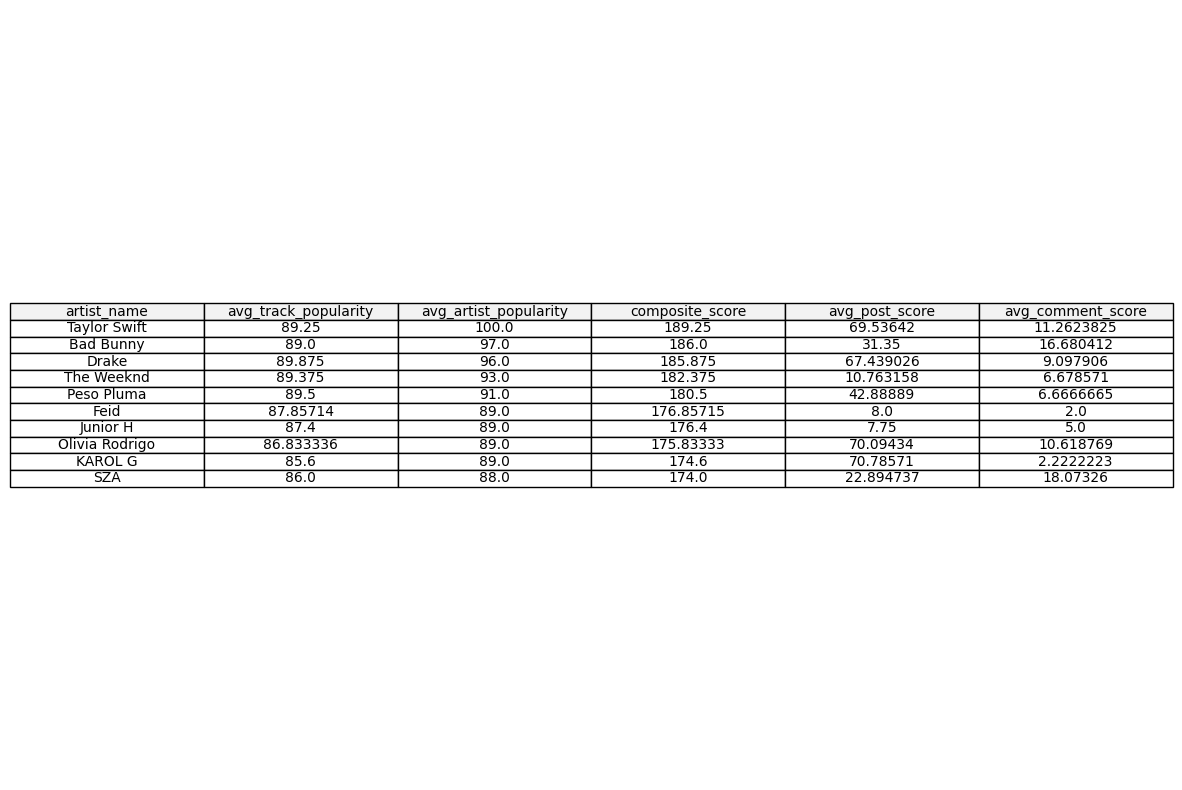

In [6]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    database="scrappeddata",
    user="postgres",
    
)
c = conn.cursor()

# Create a table to store combined information
combined_table_query = '''
    CREATE TABLE IF NOT EXISTS combined_data (
        artist_name TEXT PRIMARY KEY,
        avg_track_popularity REAL,
        avg_artist_popularity REAL,
        composite_score REAL,
        avg_post_score REAL,
        avg_comment_score REAL
    );
'''
c.execute(combined_table_query)

# Summary query with composite score calculation for Spotify data
summary_query = '''
    SELECT
        sa.artist_id,
        sa.artist_name,
        COALESCE(AVG(CAST(att.track_popularity AS INTEGER)), 0) AS avg_track_popularity,
        COALESCE(AVG(sa.artist_popularity), 0) AS avg_artist_popularity,
        (COALESCE(AVG(CAST(att.track_popularity AS INTEGER)), 0) + COALESCE(AVG(sa.artist_popularity), 0)) AS composite_score
    FROM
        spotify_artists sa
    LEFT JOIN
        artist_top_tracks att ON sa.artist_id = att.artist_id
    GROUP BY
        sa.artist_id, sa.artist_name
    ORDER BY
        composite_score DESC
    LIMIT 10
'''

# Execute the query and fetch data
c.execute(summary_query)
top_artists_data = c.fetchall()

# Create a DataFrame for the top artists from Spotify data
top_artists_df = pd.DataFrame(top_artists_data, columns=[
    'Artist ID', 'Artist Name', 'Average Track Popularity',
    'Average Artist Popularity', 'Composite Score'
])

# Create a dictionary to store the average scores for each artist from Reddit data
average_scores = {}

# Iterate over each artist from Spotify data
for index, row in top_artists_df.iterrows():
    artist = row['Artist Name']
    # Construct a query to find posts mentioning the artist
    post_query = f'''
        SELECT AVG(score) as avg_post_score
        FROM reddit_posts
        WHERE (LOWER(title) LIKE '%{artist.lower()}%' OR LOWER(selftext) LIKE '%{artist.lower()}%')
         AND subreddit IN ('music', 'LetsTalkMusic', 'MusicRecommendations', 'Spotify','indieheads','popheads','Coldplay','hiphopheads','rap','Kanye','arcticmonkeys');
    '''
    
    # Execute the post query
    c.execute(post_query)
    avg_post_score = c.fetchone()[0] or 0  # If no matching posts, set the average score to 0
    
    # Construct a query to find comments mentioning the artist
    comment_query = f'''
        SELECT AVG(score) as avg_comment_score
        FROM reddit_comments
        WHERE (LOWER(body) LIKE '%{artist.lower()}%')
        AND subreddit IN ('music', 'LetsTalkMusic', 'MusicRecommendations', 'Spotify','indieheads','popheads','Coldplay','hiphopheads','rap','Kanye','arcticmonkeys');
    '''
    
    # Execute the comment query
    c.execute(comment_query)
    avg_comment_score = c.fetchone()[0] or 0  # If no matching comments, set the average score to 0
    
    # Store the average scores in the dictionary
    average_scores[artist] = {'avg_post_score': avg_post_score, 'avg_comment_score': avg_comment_score}
    
    # Insert the combined data into the table
    combined_insert_query = '''
        INSERT INTO combined_data (artist_name, avg_track_popularity, avg_artist_popularity, composite_score, avg_post_score, avg_comment_score)
        VALUES (%s, %s, %s, %s, %s, %s)
        ON CONFLICT (artist_name) DO UPDATE 
        SET avg_track_popularity = EXCLUDED.avg_track_popularity,
            avg_artist_popularity = EXCLUDED.avg_artist_popularity,
            composite_score = EXCLUDED.composite_score,
            avg_post_score = EXCLUDED.avg_post_score,
            avg_comment_score = EXCLUDED.avg_comment_score;
    '''
    c.execute(combined_insert_query, (artist, row['Average Track Popularity'], row['Average Artist Popularity'], row['Composite Score'], avg_post_score, avg_comment_score))

# Commit the changes to the database
conn.commit()

combined_table_query = 'SELECT * FROM combined_data;'
combined_df = pd.read_sql(combined_table_query, conn)

# Set display options for better printing
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Auto-expand width to display data

# Print the pretty table
# print("Combined Table:")
# print(combined_df.to_string(index=False))

# Save the combined table as an image
plt.figure(figsize=(15, 10))
plt.table(cellText=combined_df.values, colLabels=combined_df.columns, cellLoc='center', loc='center', colColours=['#f2f2f2']*combined_df.shape[1])
plt.axis('off')  # Turn off axis
#plt.title('Combined Data Table')
plt.savefig('top10ArtistsTable.png')

# Close the database connection
conn.close()

In [5]:
pip install bs4

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 5.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=0b1c983e99dc231ef2271cdc9a6e3faa46171c0151324ad83e1bfee9a5b1d592
  Stored in directory: /home/mjadhav1/.cache/pip/wheels/d4/c8/5b/b5be9c20e5e4503d04a6eac8a3cd5c2393505c29f02bea0960
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.
